In [ ]:
A Topic Model can be defined as an unsupervised technique to discover topics across various text documents. 
These topics are abstract in nature, i.e., words which are related to each other form a topic. 
This black box (topic model) forms clusters of similar and related words which are called topics. 
These topics have a certain distribution in a document, and every topic is defined by the proportion of 
different words it contains.

<img src='topic_model1.png'>

In [ ]:
Topic modeling helps in exploring large amounts of text data, finding clusters of words, 
similarity between documents and discovering abstract topics, also used in search engines 
wherein the search string is matched with the results. 

## Latent Semantic Analysis (LSA)

In [ ]:
It include different words that mean the same thing, and also the words which have the same spelling but different meanings.

For example, consider the following two sentences:
-I liked his last novel quite a lot.
-We would like to go for a novel marketing campaign.

In the first sentence, the word ‘novel’ refers to a book, and 
In the second sentence it means new or fresh.
We can easily distinguish between these words because we are able to understand the context behind these words. 
However, a machine would not be able to capture this concept as it cannot understand the context 
in which the words have been used.

In [ ]:
LSA : comes into play as it attempts to leverage the context around the words to capture the hidden concepts (topics).

LSA is fast and easy to implement, much better than a plain vector space model.

-Since it is a linear model, it might not do well on datasets with non-linear dependencies.
-LSA assumes a Gaussian distribution of the terms in the documents, which may not be true for all problems.
-LSA involves SVD, which is computationally intensive and hard to update as new data comes up.

Using the '20 Newsgroup' dataset, which can be downoloaded from here : https://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##### Download using sklearn -> dataset

In [9]:
# from sklearn.datasets import fetch_20newsgroups       # do not run this again and again, once downloaded the dataset. 

# dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))

#### import the downloaded dataset

In [10]:
from sklearn import datasets             # download above from sklearn datasets, here importing it.

dataset = datasets.fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))

In [11]:
documents = dataset.data
len(documents)                     # The dataset has 11,314 text documents distributed across 20 different newsgroups.

11314

In [12]:
dataset.target_names             # 20 different newsgroups

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [13]:
news_df = pd.DataFrame({'document': documents})         # create DF of 'documents'
news_df.head()

,document
0,Well i'm not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."


### Data Preprocessing

In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

lem = WordNetLemmatizer()      # used when meaning of word is important   ,  'lem.lemmatize(word)'  
ps = PorterStemmer()         # we can also use 'ps.stem(word)' , But it is used when meaning of word is not important

corpus=[]

for i in range(len(news_df['document'])):
    punctuation_removal = re.sub('[^a-zA-Z]', ' ', news_df.document[i])     # 1st remove punctuation
    word_lower = punctuation_removal.lower()                                # 2nd lower the words 
    list_words = word_lower.split()                                         # 3rd create list of words by removing space  
    stopword_removal = [ps.stem(word) for word in list_words if not word in set(stopwords.words('english'))]  # remove stopwords
    words_join = ' '.join(stopword_removal)       # finally , join all the words
    corpus.append(words_join)                     # then append to 'corpus' list

In [15]:
news_df['clean_df'] = corpus           # assigning the 'corpus' into news_df -> 'clean_df' new coulmn
news_df.head()

,document,clean_df
0,Well i'm not sure about the story nad it did s...,well sure stori nad seem bias disagre statemen...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re...",yeah expect peopl read faq etc actual accept h...
2,Although I realize that principle is not one o...,although realiz principl one strongest point w...
3,Notwithstanding all the legitimate fuss about ...,notwithstand legitim fuss propos much chang at...
4,"Well, I will have to change the scoring on my ...",well chang score playoff pool unfortun time ri...


In [16]:
# Compare the preprocessing steps with the original data

print('clean_df of corpus : \n\n', news_df['clean_df'][0])                           
print('\nOriginal text data : \n\n', news_df['document'][0])

clean_df of corpus : 

 well sure stori nad seem bias disagre statement u media ruin israel reput redicul u media pro isra media world live europ realiz incid one describ letter occur u media whole seem tri ignor u subsid israel exist european least degre think might reason report clearli atroc shame austria daili report inhuman act commit isra soldier bless receiv govern make holocaust guilt go away look jew treat race got power unfortun

Original text data : 

 Well i'm not sure about the story nad it did seem biased. What
I disagree with is your statement that the U.S. Media is out to
ruin Israels reputation. That is rediculous. The U.S. media is
the most pro-israeli media in the world. Having lived in Europe
I realize that incidences such as the one described in the
letter have occured. The U.S. media as a whole seem to try to
ignore them. The U.S. is subsidizing Israels existance and the
Europeans are not (at least not to the same degree). So I think
that might be a reason they re

## Now create - Document-term Matrix using (Tfidf Vectorizer)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, max_df = 0.5, smooth_idf=True)   # using max_features=5000 , change acc.

X = vectorizer.fit_transform(news_df['clean_df'])
X.shape

(11314, 5000)

In [1]:
# vectorizer.vocabulary_      # gives vocabulary in dict{} form , we have fit the TFidfVector on 'vectorizer'

In [2]:
# see the vectorized data, 1: Row number of ‘X_train’, 2: Unique Integer number of each word in the first row,
# 3: Score calculated by TF-IDF Vectorizer

# print(X)

## Topic Modeling

In [ ]:
Now represent 'each term' and 'document' as a vector. 
Using the document-term matrix and decompose it into multiple matrices. 
Here we use 'sklearn’s TruncatedSVD' to perform the task of matrix decomposition.

So the data comes from 20 different newsgroups, let’s try to have 20 topics for our text data. 
The number of topics can be specified by using the 'n_components' parameter.

In [20]:
from sklearn.decomposition import TruncatedSVD                    # singular value decomposition (SVD)

svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

TruncatedSVD(algorithm='randomized', n_components=20, n_iter=100,
       random_state=122, tol=0.0)

##### The components of svd_model are  topics.

In [21]:
len(svd_model.components_)     # it has the value what vector gives for the words

20

##### Now print a few most important words in each of the 20 topics.

In [22]:
terms = vectorizer.get_feature_names()          # it has the words(terms)

for i, comp in enumerate(svd_model.components_): 
    terms_comp = zip(terms, comp)                                               # zip(words of terms, vector values)  
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]     # [:7] taking top 7
    print("Topic "+str(i)+ " : ",  ' '.join(i[0] for i in sorted_terms))

Topic 0 :  would one use like get know peopl
Topic 1 :  window thank file use card drive do
Topic 2 :  game team year play player car drive
Topic 3 :  key chip encrypt use clipper govern secur
Topic 4 :  drive scsi card god mb disk hard
Topic 5 :  thank pleas mail anyon edu know email
Topic 6 :  geb dsl chastiti jxp cadr pitt intellect
Topic 7 :  god key game chip team encrypt christian
Topic 8 :  drive file armenian disk edu israel mail
Topic 9 :  card video driver armenian monitor israel color
Topic 10 :  drive would know thank anyon scsi peopl
Topic 11 :  window car key driver armenian drive god
Topic 12 :  window would use pleas like game mail
Topic 13 :  would file car card gun driver law
Topic 14 :  armenian anyon israel would thank car jew
Topic 15 :  use gun one game file law printer
Topic 16 :  driver anyon car gun space year thank
Topic 17 :  car israel driver com would isra problem
Topic 18 :  would god com armenian get go work
Topic 19 :  armenian one driver like use look d

#### Saving the model using ( joblib )

In [23]:
from sklearn.externals import joblib

In [24]:
joblib.dump(svd_model, 'LSA_svd_topic')             #  dump the model into 'LSA_svd_topic' file

['LSA_svd_topic']

In [25]:
load_svd_model = joblib.load('LSA_svd_topic')         # loading the model 

### Visualize the Topics

In [ ]:
We cannot visualize more than 3 dimensions, but there are techniques like PCA and t-SNE 
which can help us visualize high dimensional data into lower dimensions.

Here we are using a new technique --> UMAP (Uniform Manifold Approximation and Projection).

In [26]:
X_topics = load_svd_model.fit_transform(X)


import umap                                                                         # conda install -c conda-forge umap-learn


reducer = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=122)

embedding = reducer.fit_transform(X_topics)

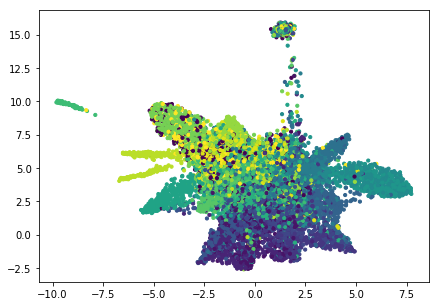

In [32]:
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c=dataset.target, s=10, edgecolor=None)
plt.show()